In [208]:
import pandas as pd

from pandas import DataFrame
import matplotlib.pyplot as plt
import matplotlib
import csv
import numpy as np
import math
import matplotlib.transforms as mtrans

from sklearn import metrics
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [209]:

path = "C://Users//k//Documents//Unicamp//IC//rv_webviz_celmar//reservoirviewer_webviz//webviz_plugin_boilerplate//plugins//RV//generated//intermediary_file.csv"
ffile = DataFrame(pd.read_csv(path))
max_i: int = int(pd.to_numeric(ffile.columns[0]))
max_j: int = int(pd.to_numeric(ffile.columns[1]))
num_of_models: int = int(pd.to_numeric(ffile.columns[2]))
colorMap = 'jet'
print("i, j, k: ", max_i, max_j, num_of_models)

i, j, k:  46 69 199


C:\Users\k\AppData\Local\Temp\ipykernel_11488\284471270.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  ffile = DataFrame(pd.read_csv(path))


In [210]:
column = DataFrame(ffile[ffile.columns[0]]).squeeze().tolist()
grid = np.array(column[1:], dtype=np.float64).reshape(
            num_of_models, max_i, max_j
        )
print(num_of_models)
grid = file_content.reshape(num_of_models, max_i*max_j)
print(num_of_models)

199
199


In [211]:
distortions = []
inertias = []
mapping1 = {}
map_inertia = {}
K = range(1, 15)
accumulated_inertia = 0
best_k = 0
  
for k in K:
    # Building and fitting the model
    kmean_model = KMeans(n_clusters=k).fit(grid)
  
    inertias.append(kmean_model.inertia_)

    map_inertia[k] = kmean_model.inertia_
    
for idx, k in enumerate(map_inertia):
    accumulated_inertia = np.sum(inertias[0:idx])
    inertias_sum = np.sum(inertias)
    
    if (accumulated_inertia/inertias_sum >= 0.65 ):
        best_k = k
        print(best_k)
        break

10


In [212]:
kmean_model = KMeans(n_clusters=best_k).fit(grid)
kmean_model.fit(grid)
y_kmeans = kmean_model.predict(grid)
dictteste = {}

for idx, g in enumerate(grid):
    dictteste[idx] = y_kmeans[idx]
    
print(dictteste)

{0: 3, 1: 6, 2: 7, 3: 4, 4: 1, 5: 6, 6: 5, 7: 9, 8: 5, 9: 5, 10: 1, 11: 4, 12: 9, 13: 7, 14: 9, 15: 3, 16: 6, 17: 8, 18: 2, 19: 4, 20: 1, 21: 4, 22: 9, 23: 7, 24: 7, 25: 6, 26: 3, 27: 3, 28: 4, 29: 2, 30: 4, 31: 2, 32: 4, 33: 4, 34: 9, 35: 7, 36: 3, 37: 0, 38: 2, 39: 8, 40: 1, 41: 7, 42: 8, 43: 9, 44: 3, 45: 3, 46: 2, 47: 2, 48: 6, 49: 9, 50: 1, 51: 0, 52: 3, 53: 2, 54: 7, 55: 5, 56: 1, 57: 7, 58: 6, 59: 8, 60: 2, 61: 1, 62: 7, 63: 7, 64: 4, 65: 7, 66: 2, 67: 3, 68: 6, 69: 8, 70: 7, 71: 4, 72: 6, 73: 1, 74: 4, 75: 1, 76: 3, 77: 4, 78: 3, 79: 4, 80: 2, 81: 4, 82: 3, 83: 7, 84: 2, 85: 9, 86: 7, 87: 1, 88: 1, 89: 5, 90: 1, 91: 0, 92: 5, 93: 3, 94: 5, 95: 5, 96: 2, 97: 4, 98: 5, 99: 3, 100: 9, 101: 4, 102: 4, 103: 9, 104: 6, 105: 0, 106: 4, 107: 2, 108: 3, 109: 1, 110: 4, 111: 9, 112: 9, 113: 3, 114: 3, 115: 6, 116: 4, 117: 6, 118: 4, 119: 1, 120: 3, 121: 3, 122: 6, 123: 1, 124: 4, 125: 9, 126: 9, 127: 9, 128: 3, 129: 2, 130: 3, 131: 1, 132: 6, 133: 3, 134: 7, 135: 4, 136: 4, 137: 6, 138: 

In [213]:
# def mergeSort(alist):
    # if len(alist)>1:
    #     mid = len(alist)//2
    #     left_half = alist[:mid]
    #     right_half = alist[mid:]

    #     mergeSort(left_half)
    #     mergeSort(right_half)

    #     i=0
    #     j=0
    #     k=0
    #     while i < len(left_half) and j < len(right_half):
    #         if dictteste[left_half[i]] < dictteste[right_half[j]]:
    #             alist[k]=left_half[i]
    #             i=i+1
    #         else:
    #             alist[k]=right_half[j]
    #             j=j+1
    #         k=k+1

    #     while i < len(left_half):
    #         alist[k]=left_half[i]
    #         i=i+1
    #         k=k+1

    #     while j < len(right_half):
    #         alist[k]=right_half[j]
    #         j=j+1
    #         k=k+1

In [214]:
 model = [m for m in range((num_of_models))]
 print(model)

# mergeSort(model)

model = sorted(model, key=dictteste.get)

model = np.array(model)

grid = grid[model]
print(model)

newDict = {k: dictteste[k] for k in model}
print(newDict)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198]
[ 37  51  91 105 142 190   4  10  20  40  50  56  61  73  75  87  88  90
 109 119 123 131 148 162 163 167 180 192 

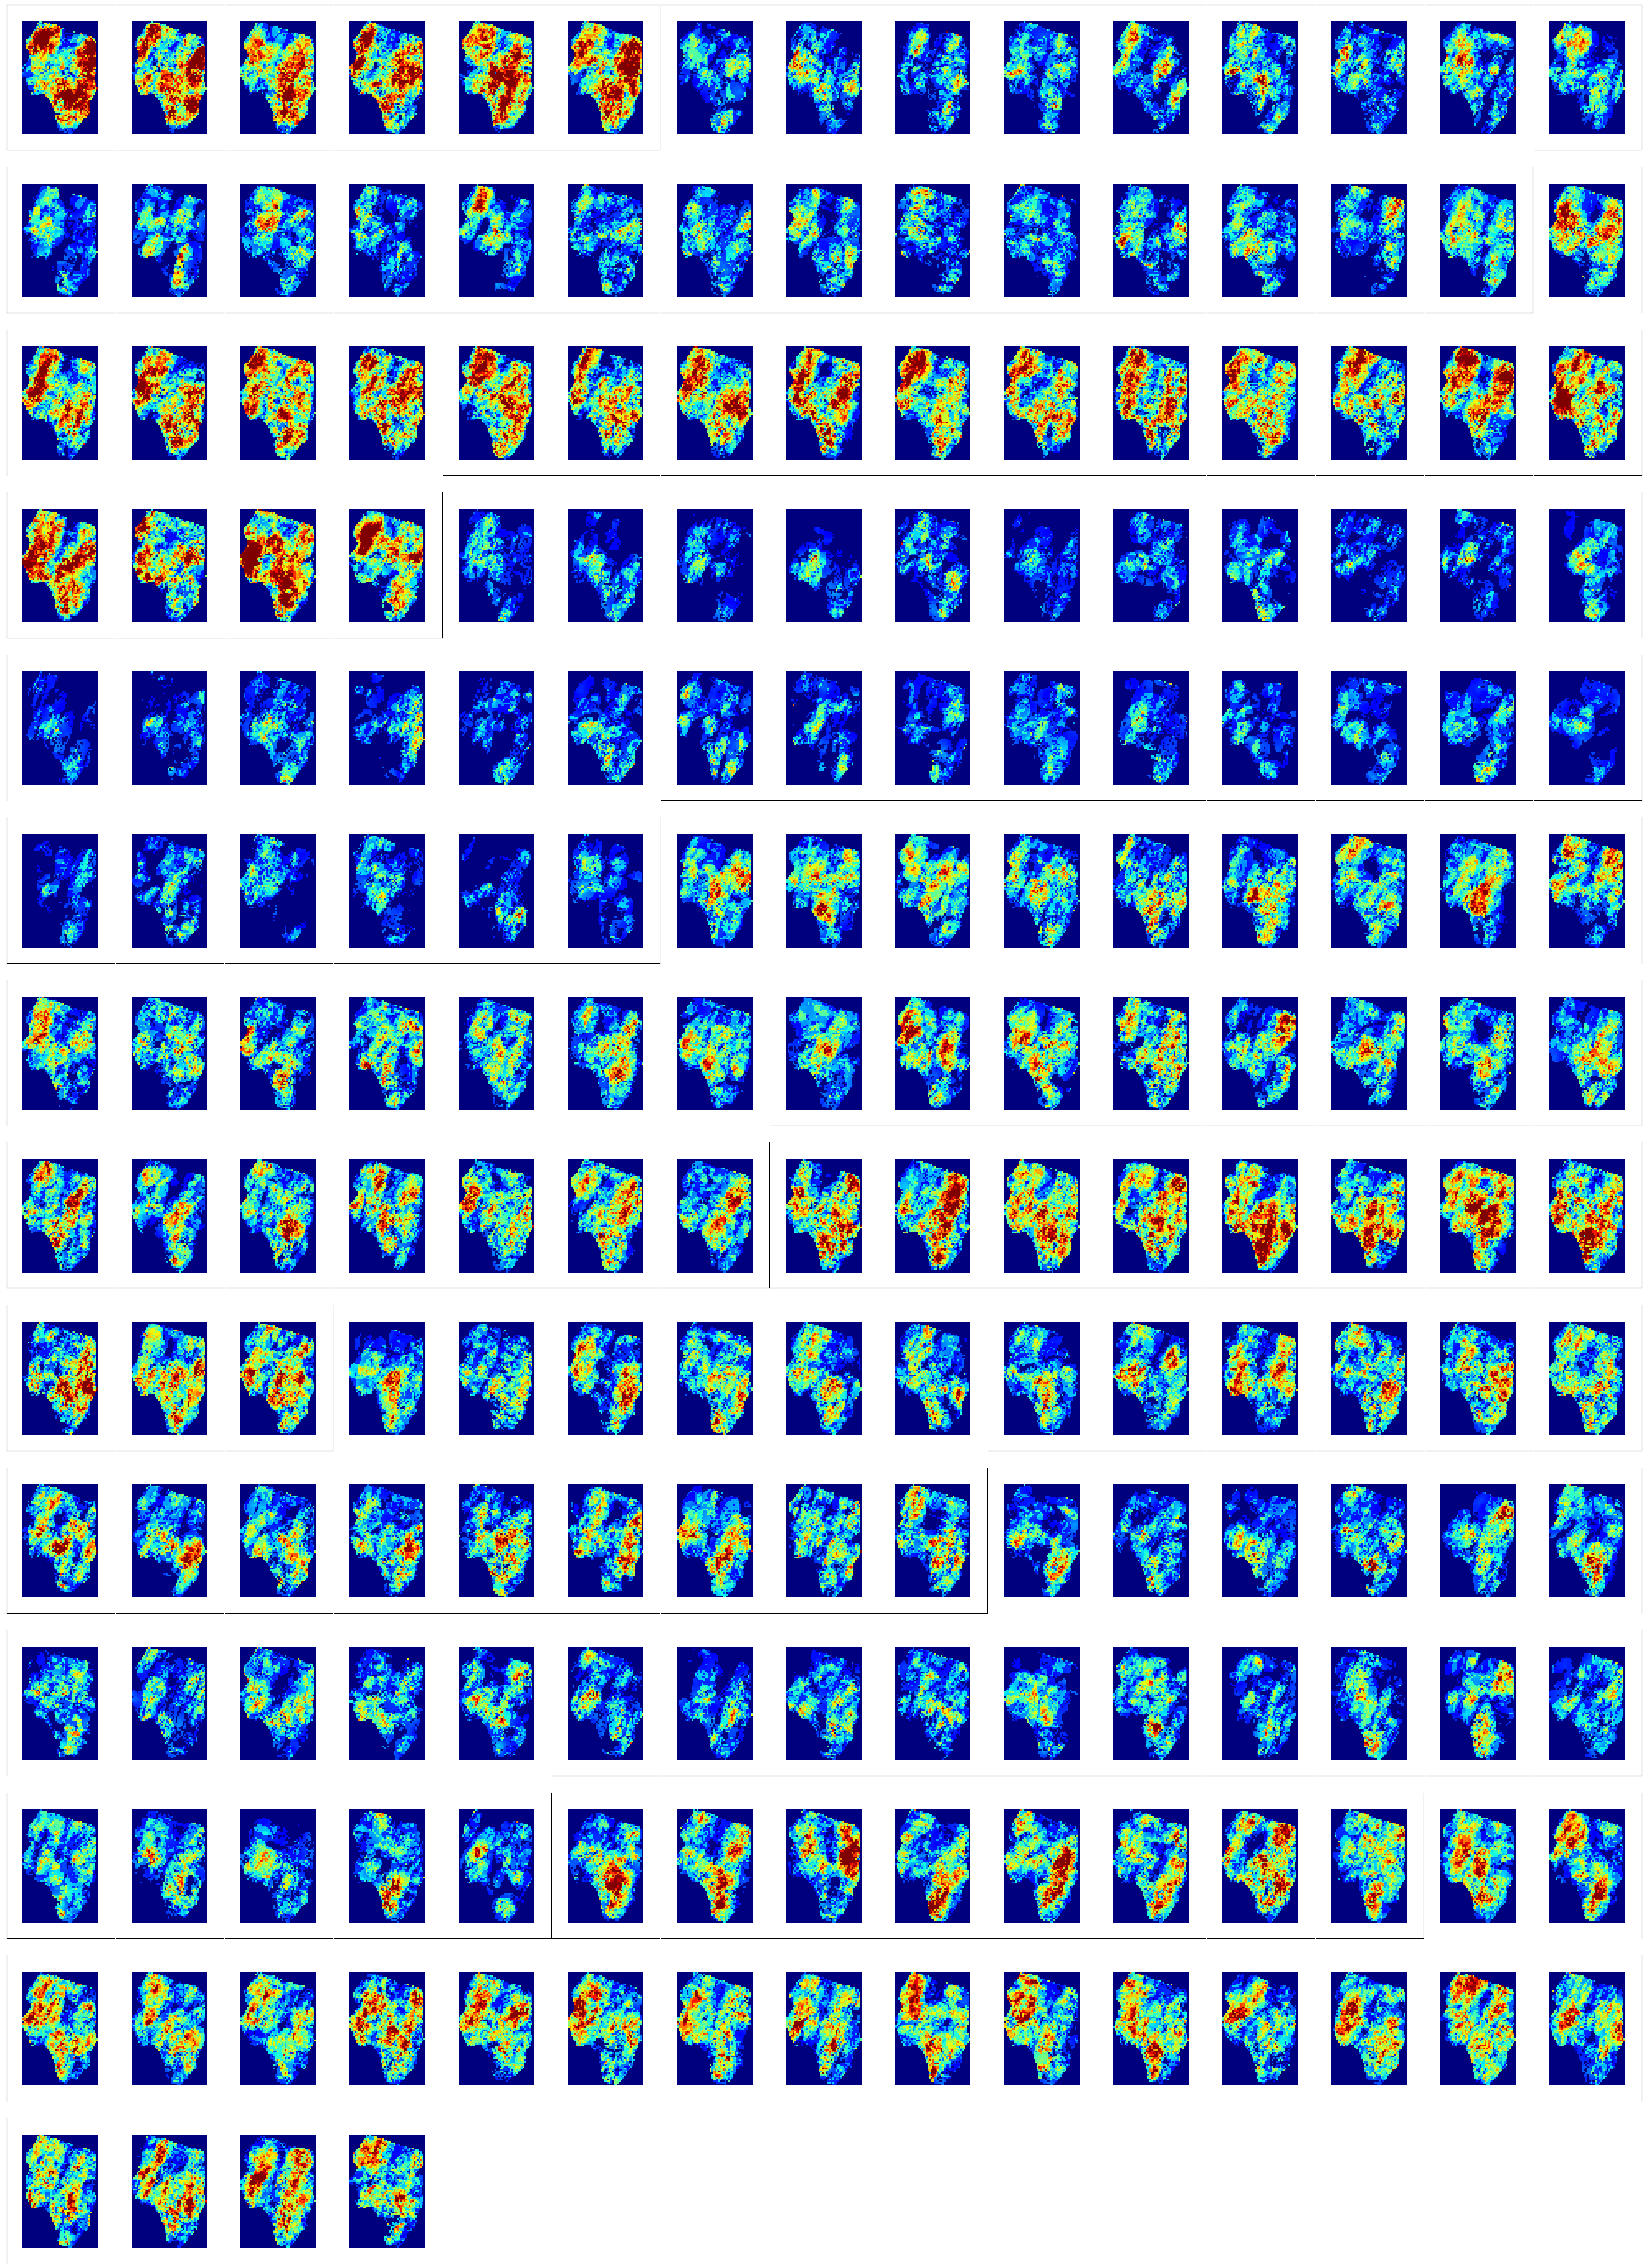

In [215]:
from matplotlib import gridspec

fig = plt.figure(figsize=(max_i, max_j))

grid = grid.reshape(num_of_models,max_i,max_j )
# grid = TESTEGRID.reshape(num_of_models,max_i,max_j)
gs = gridspec.GridSpec(dimension, dimension,
                       wspace=0.01, hspace=0.01)



count = 0
for i in range(dimension):
    for j in range(dimension):
        if(count < num_of_models):
            ax = plt.subplot(gs[i, j])
            rotated = np.rot90(grid[count], 3, (0,1))
            flipped = np.flip(rotated,1)
            ax.imshow(flipped, cmap='jet',
                    interpolation='none', vmin=0, vmax=256)
            
            ax.set_xlim(-10, max_i+10)
            ax.set_ylim(-10, max_j+10)
            
            ax.set_xticks([])
            ax.set_yticks([])
            fig.add_subplot(ax)
            count = count + 1
        else:
            break

all_axes = fig.get_axes()

#show only the outside spines
for index, ax in enumerate(all_axes):
    for sp in ax.spines.values():
        sp.set_visible(False)
        if(index < num_of_models-1):
            if newDict[model[index]] != newDict[model[index+1]]:
                ax.spines['right'].set_visible(True)
        if(index < num_of_models-dimension):
            if newDict[model[index]] != newDict[model[index+dimension]]:
                ax.spines['bottom'].set_visible(True)
                
        if ax.get_subplotspec().is_first_row():
            ax.spines['top'].set_visible(True)
        if ax.get_subplotspec().is_last_row():
            ax.spines['bottom'].set_visible(True)
        if ax.get_subplotspec().is_first_col():
            ax.spines['left'].set_visible(True)
        if ax.get_subplotspec().is_last_col():
            ax.spines['right'].set_visible(True)

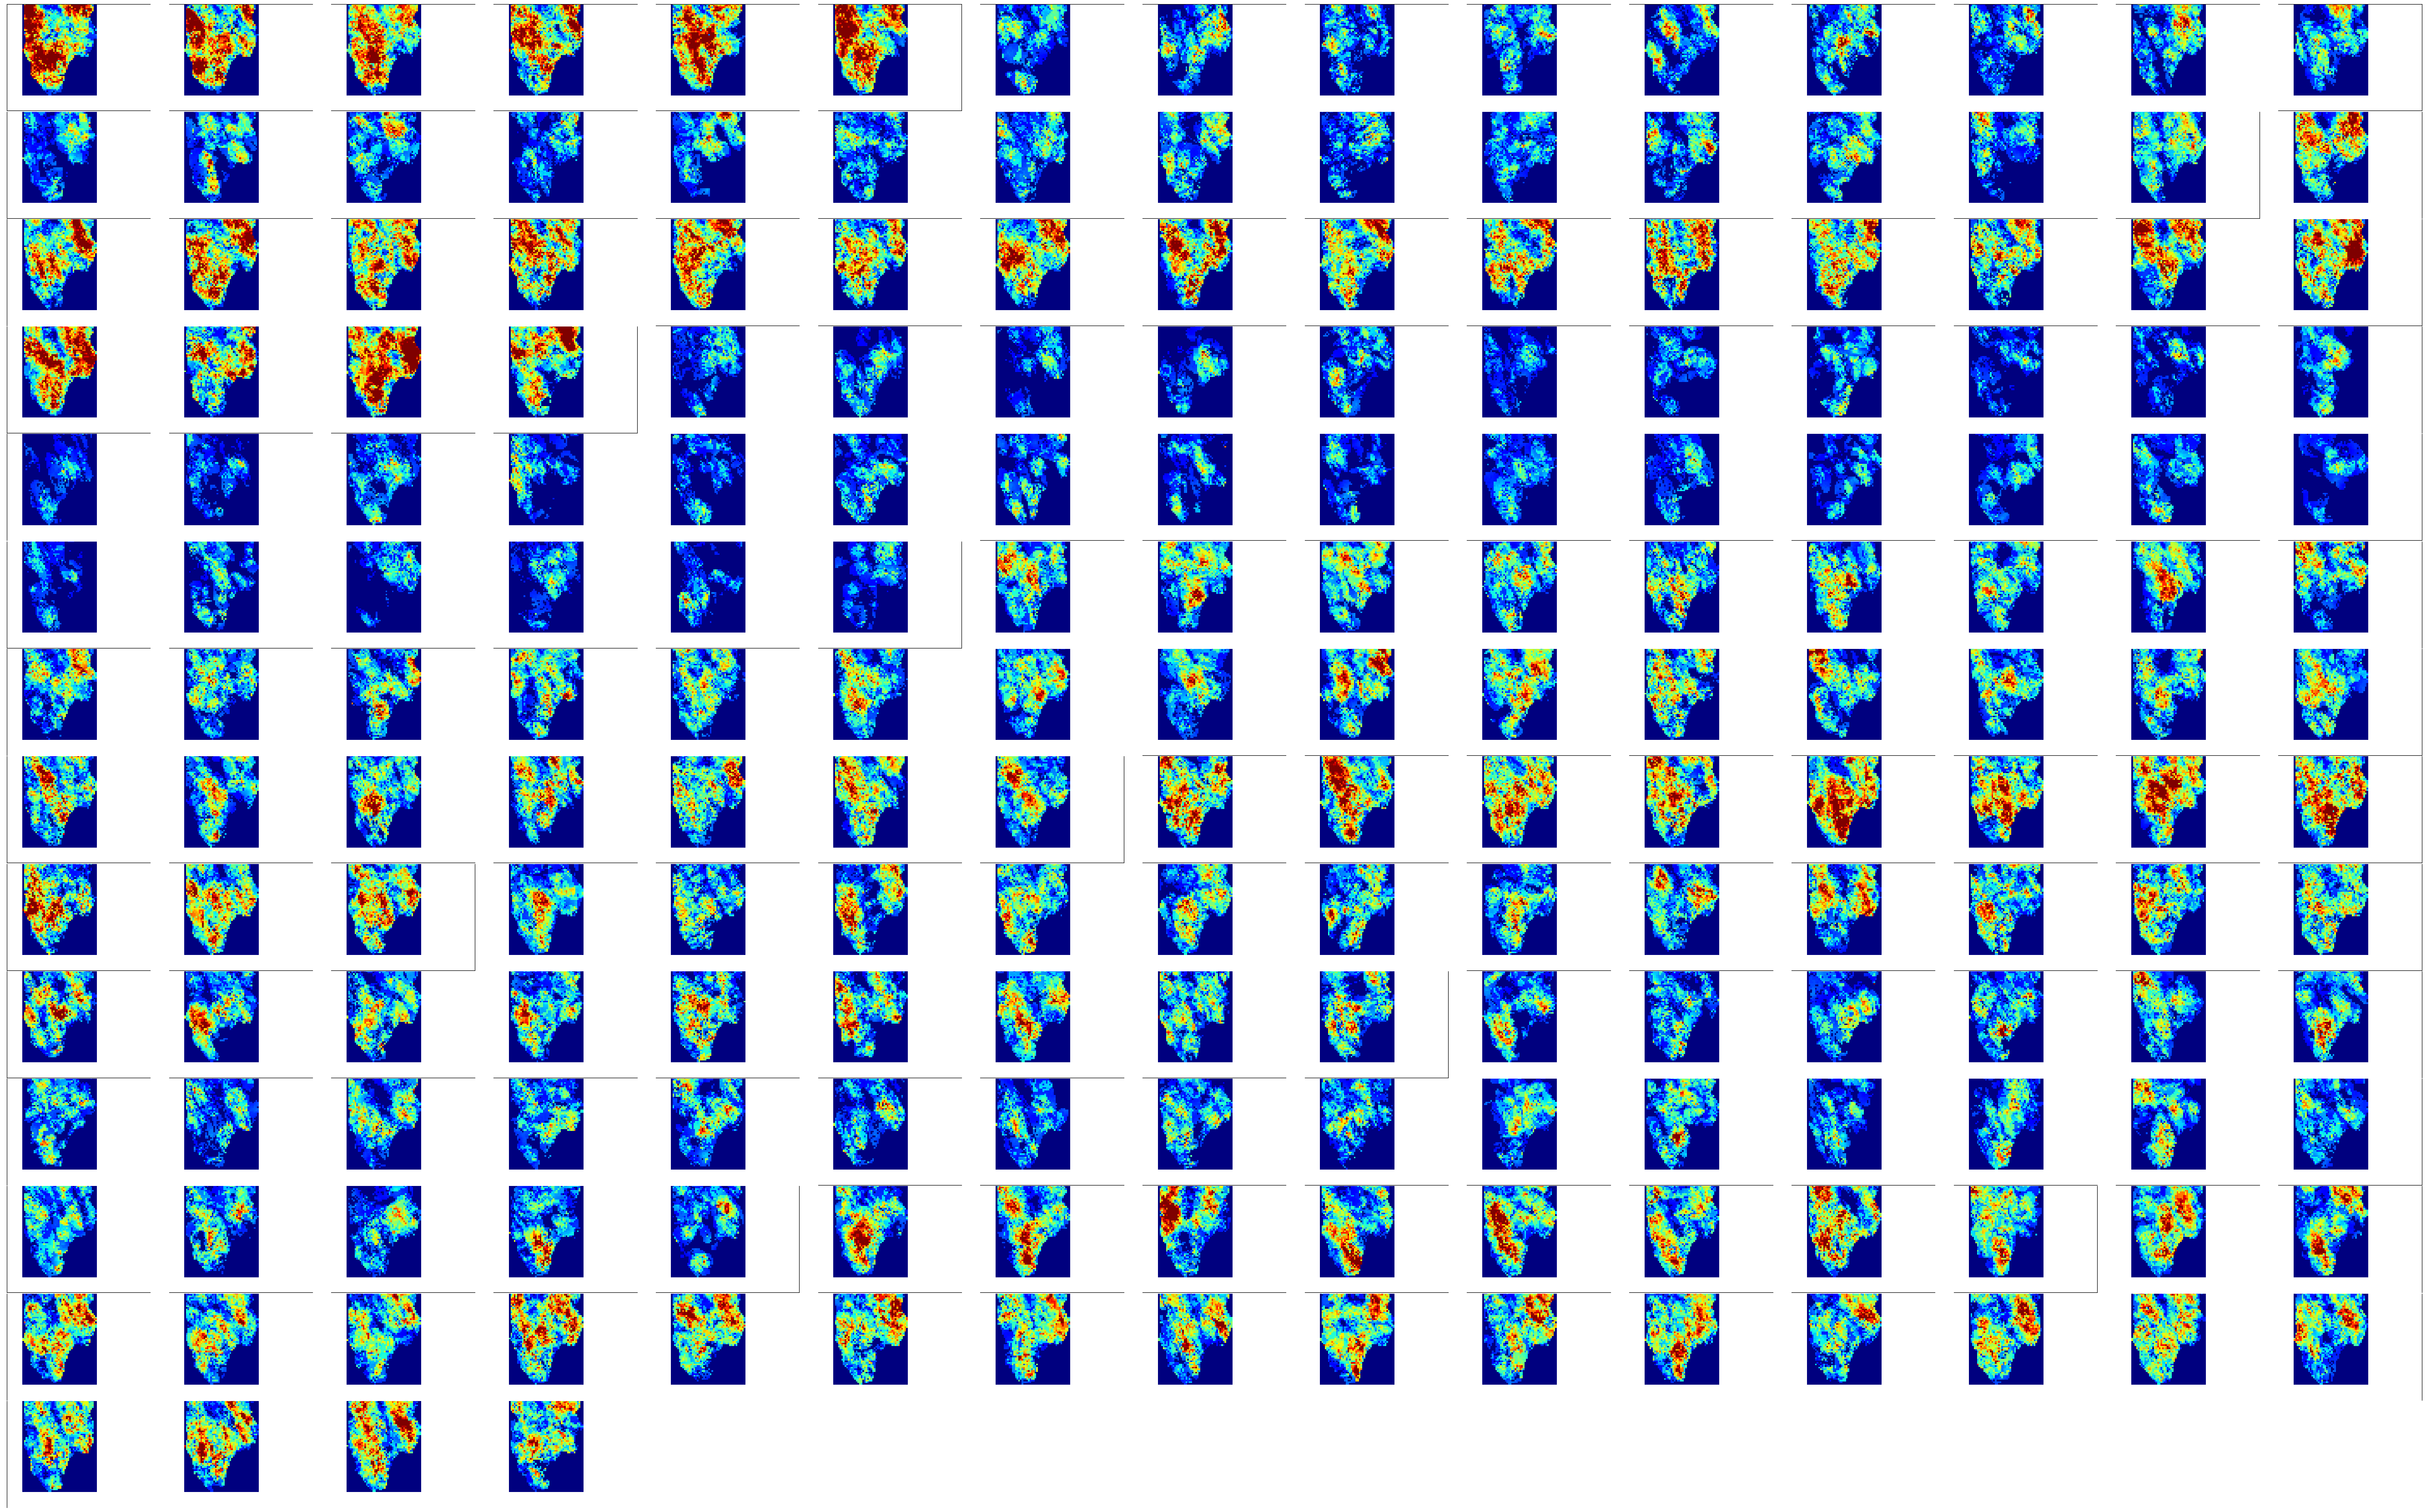

In [216]:
from matplotlib import gridspec

fig = plt.figure(figsize=(max_j, max_i))

grid = grid.reshape(num_of_models,max_i,max_j )
# grid = TESTEGRID.reshape(num_of_models,max_i,max_j)
gs = gridspec.GridSpec(dimension, dimension,
                       wspace=0.01, hspace=0.01)



count = 0
for i in range(dimension):
    for j in range(dimension):
        if(count < num_of_models):
            ax = plt.subplot(gs[i, j])
            rotated = np.rot90(grid[count], 3, (0,1))
            ax.imshow(rotated, cmap='jet',
                    interpolation='none', vmin=0, vmax=256)
            
            ax.set_xlim(-10, max_j+10)
            ax.set_ylim(-10, max_i+10)
            
            ax.set_xticks([])
            ax.set_yticks([])
            fig.add_subplot(ax)
            count = count + 1
        else:
            break

all_axes = fig.get_axes()

#show only the outside spines
for index, ax in enumerate(all_axes):
    for sp in ax.spines.values():
        sp.set_visible(False)
        if(index < num_of_models-1):
            if newDict[model[index]] != newDict[model[index+1]]:
                ax.spines['right'].set_visible(True)
        if(index < num_of_models-dimension):
            if newDict[model[index]] != newDict[model[index+dimension]]:
                ax.spines['bottom'].set_visible(True)
                
        if ax.get_subplotspec().is_first_row():
            ax.spines['top'].set_visible(True)
        if ax.get_subplotspec().is_last_row():
            ax.spines['bottom'].set_visible(True)
        if ax.get_subplotspec().is_first_col():
            ax.spines['left'].set_visible(True)
        if ax.get_subplotspec().is_last_col():
            ax.spines['right'].set_visible(True)

In [217]:
items = ["C", "B", "A"]

order = {
    "B" : 1,
    "C" : 2,
    "A" : 3,
}

print("Without key", sorted(items))
print("With key", (sorted(items, key=order.get)))

 

Without key ['A', 'B', 'C']
With key ['B', 'C', 'A']


In [218]:
{}

{}